In [1]:
from jupyterthemes import jtplot
jtplot.style()

# Spam Detection 

This is a simple solution of this problem for begginers to introduce data science principles for a easy classification problem. In this `Kernel` we use `Pandas Dataframe` as Data structure and `sklearn` for machine learning stuffs.

### A Data Science Framework



1. **Define the Problem:** If data science, big data, machine learning, predictive analytics, business intelligence, or any other buzzword is the solution, then what is the problem? As the saying goes, don't put the cart before the horse. Problems before requirements, requirements before solutions, solutions before design, and design before technology. Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve.

2. **Gather the Data:** John Naisbitt wrote in his 1984 (yes, 1984) book Megatrends, we are “drowning in data, yet staving for knowledge." So, chances are, the dataset(s) already exist somewhere, in some format. It may be external or internal, structured or unstructured, static or streamed, objective or subjective, etc. As the saying goes, you don't have to reinvent the wheel, you just have to know where to find it. In the next step, we will worry about transforming "dirty data" to "clean data."

3. **Prepare Data for Consumption:** This step is often referred to as data wrangling, a required process to turn “wild” data into “manageable” data. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.

4. **Perform Exploratory Analysis:** Anybody who has ever worked with data knows, garbage-in, garbage-out (GIGO). Therefore, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. In addition, data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.

5. **Model Data:** Like descriptive and inferential statistics, data modeling can either summarize the data or predict future outcomes. Your dataset and expected results, will determine the algorithms available for use. It's important to remember, algorithms are tools and not magical wands or silver bullets. You must still be the master craft (wo)man that knows how-to select the right tool for the job. An analogy would be asking someone to hand you a Philip screwdriver, and they hand you a flathead screwdriver or worst a hammer. At best, it shows a complete lack of understanding. At worst, it makes completing the project impossible. The same is true in data modelling. The wrong model can lead to poor performance at best and the wrong conclusion (that’s used as actionable intelligence) at worst.


6. **Validate and Implement Data Model:** After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our model overfit, generalize, or underfit our dataset.


7. **Optimize and Strategize:** This is the "bionic man" step, where you iterate back through the process to make it better...stronger...faster than it was before. As a data scientist, your strategy should be to outsource developer operations and application plumbing, so you have more time to focus on recommendations and design. Once you're able to package your ideas, this becomes your “currency exchange" rate.

*Source : [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)*

## Step1: Define the Problem
In this problem we want to find all spams using classification problems. There is some significant words in spams which can be used to find spams. 

## Step2: Gather the Data
We are using [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) dataset from kaggle website. This is a collection of SMS messages tagged if they are `spam` or `ham`.

## Step3: Prepare the Data 
I think this step is the most step of these kind of problems. 

### Meet and Greet Data

Firs we create a repository for our inputs. 

In [2]:
import os
# print(os.listdir("../input")) # For kaggle kernel

As i said we use `Pandas Dataframe` as our data structure. so we import it and load `spam.csv`.

In [3]:
import pandas as pd 
import numpy as np
# DATASET_DIR = '../input'  # For kaggle kernel
DATASET_DIR = './datasets/spam'
DATASET_NAME = 'spam.csv'
dataset_path = os.path.join(DATASET_DIR, DATASET_NAME)
dataset = pd.read_csv(dataset_path, encoding='ISO-8859-1')

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Split TrainSet and TestSet 
It is important to split these two. You always should split test set at the beggining of your solution. At the end of solution you return to test set again and use it just for test!


#### How to split these two ?
Well there is some ways to do that. For example you can select a fraction of your dataset by index (aka. 0 to 1000 indices). Another way which used is random selection. But what if we want to run our thest again?? Well we can select a const random seed. I use `sklearn` for this which used random strategy. 

First we split labels from other datas

In [5]:
X = dataset.drop('v1', axis=1)
y = dataset['v1']

Then Split them.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1978,No I'm in the same boat. Still here at my moms...,NaN,NaN,NaN
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,NaN,NaN,NaN
3935,They r giving a second chance to rahul dengra.,NaN,NaN,NaN
4078,O i played smash bros &lt;#&gt; religiously.,NaN,NaN,NaN
4086,PRIVATE! Your 2003 Account Statement for 07973...,NaN,NaN,NaN


This method also shuffle datas. So you don't need to shuffle them. If you selected train and test sets manually you should shuffle them. Becasue it could be dependancy between datas in a sequence and it impacts on your classification.

### The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

#### Correcting and Completing
We should first review our data and see if there is not to be unaccaptable features and datas. Also there is null values in our data some algorithms can handle null values but it's better to handle these null values.

For this first see our data informations. 

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4457 entries, 1978 to 860
Data columns (total 4 columns):
v2            4457 non-null object
Unnamed: 2    38 non-null object
Unnamed: 3    9 non-null object
Unnamed: 4    5 non-null object
dtypes: object(4)
memory usage: 174.1+ KB


**There is a lot's of null values in 3 last columns. We can recognize these columns are not usefull and we can drop them.**

For this goal we write a sklearn transformer to use it with our pipelines in future.

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelection(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[attrs]

In [9]:
attrs = ['v2']
selector = DataFrameSelection(attrs)
X = selector.transform(X_train)
X.head()

,v2
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...


We should also change labels to a numeric code. We use sklearn LabelEncoder for these purpose.

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_train

array([0, 1, 0, ..., 0, 0, 0])

### Creating
To create new features that can help us to solve this problem we should first analys our data to find out important words. then we can use them to create a `sparse matrix` of existence of these words in message.

First let join X and y to can analys data

In [11]:
Xy = X
Xy['status'] = y_train
Xy.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,v2,status
1978,No I'm in the same boat. Still here at my moms...,0
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1
3935,They r giving a second chance to rahul dengra.,0
4078,O i played smash bros &lt;#&gt; religiously.,0
4086,PRIVATE! Your 2003 Account Statement for 07973...,1


First See how much of them are spams


<BarContainer object of 2 artists>

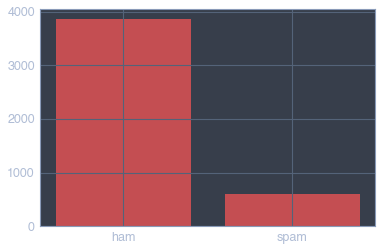

In [12]:
import matplotlib.pyplot as plt
plt.bar(('ham', 'spam'), (len(Xy[Xy['status'] == 0]),len(Xy[Xy['status'] == 1])), color='r')

Well there is a lots of ham data in training data

In [13]:
Xy.groupby('status').describe()

v2                                                               
       count unique                                                top freq
status                                                                     
0       3860   3657                             Sorry, I'll call later   22
1        597    537  I don't know u and u don't know me. Send CHAT ...    3

We add length to find out if it is important or not.

In [14]:
class LengthAdder(BaseEstimator, TransformerMixin):
    def __init__(self, msg_attr='v2'):
        self.msg_attr = msg_attr
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dataset = X.copy()
        dataset['len'] = X[self.msg_attr].apply(len)
        return dataset

In [15]:
Xy = LengthAdder().transform(Xy)
Xy.head()

,v2,status,len
1978,No I'm in the same boat. Still here at my moms...,0,83
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1,137
3935,They r giving a second chance to rahul dengra.,0,46
4078,O i played smash bros &lt;#&gt; religiously.,0,46
4086,PRIVATE! Your 2003 Account Statement for 07973...,1,148


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11407e080>,
      dtype=object)

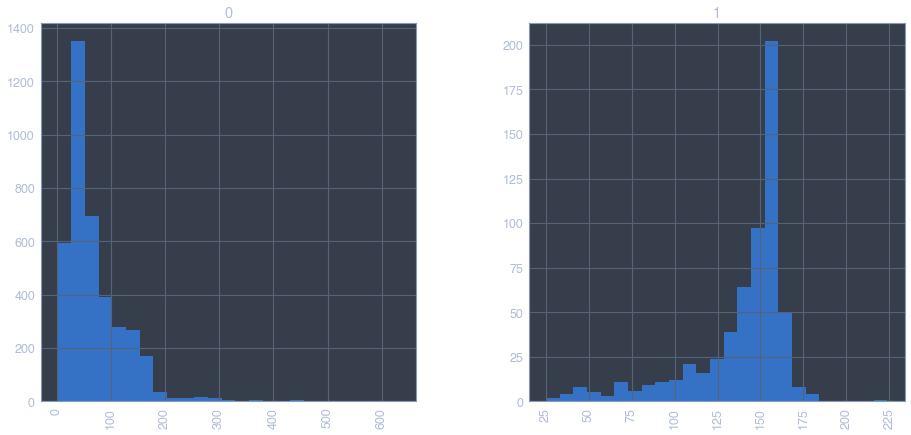

In [16]:
Xy.hist(column='len', by='status', bins=25, figsize=(15, 7))

From this we can recognize that length of msg can be usefull to find out spam messages.

##### Creating Sparse Matrix
to find out spam messages there is a way to get all possible words in messages and create a sparse matrix of existence of word in message or not. Then train classifier on this sparse matrix.

For that we write a transformer which convert our messages to corresponding sparse matrix.

But before that we should add some hyperparamters. Like converting messages to lowercase, remove punctuation, replace all URLs with `URL`, replace all numbers with `NUMBER`, or even perform stemming.

#### To Lower Case 
if we want to compare words to each other they should all be in lower case. So lets transform it.

In [17]:
class ToLowerCase(BaseEstimator, TransformerMixin):
    def __init__(self, msg_attr='v2'):
        self.msg_attr = msg_attr
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dataset = X.copy()
        dataset[self.msg_attr] = dataset[self.msg_attr].str.lower()
        return dataset
Xy = ToLowerCase().transform(Xy)
Xy.head()

,v2,status,len
1978,no i'm in the same boat. still here at my moms...,0,83
3989,(bank of granite issues strong-buy) explosive ...,1,137
3935,they r giving a second chance to rahul dengra.,0,46
4078,o i played smash bros &lt;#&gt; religiously.,0,46
4086,private! your 2003 account statement for 07973...,1,148


#### Delete Stop Words and Punctuations
**stop word** is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.



In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
import nltk 
class DeleteStopWordsAndPunc(BaseEstimator, TransformerMixin):
    def __init__(self, lang='english', msg_attr='v2'):
        self.lang = lang
        self.msg_attr = msg_attr
        nltk.download('stopwords')
        self.stop_words = set(stopwords.words('english')) 
        self.punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~+~'''
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dataset = X.copy()
        dataset[self.msg_attr] = dataset[self.msg_attr].apply(self.delete_stop_words)
        dataset[self.msg_attr] = dataset[self.msg_attr].apply(self.delete_punc)
        return dataset
    def delete_stop_words(self, msg):
        tokens = WhitespaceTokenizer().tokenize(msg)
        return ' '.join([w for w in tokens if w not in self.stop_words])
    def delete_punc(self, msg):
        no_punct = ""
        for char in msg:
            if char not in self.punctuations:
                no_punct = no_punct + char
        return no_punct

Ok. Now let see dataframe **before** this transform :

In [19]:
Xy.head()

,v2,status,len
1978,no i'm in the same boat. still here at my moms...,0,83
3989,(bank of granite issues strong-buy) explosive ...,1,137
3935,they r giving a second chance to rahul dengra.,0,46
4078,o i played smash bros &lt;#&gt; religiously.,0,46
4086,private! your 2003 account statement for 07973...,1,148


And **after** :

In [20]:
Xy = DeleteStopWordsAndPunc().transform(Xy)
Xy.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/farzad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v2,status,len
1978,im boat still moms check yo im half naked,0,83
3989,bank granite issues strongbuy explosive pick m...,1,137
3935,r giving second chance rahul dengra,0,46
4078,played smash bros ltgt religiously,0,46
4086,private 2003 account statement 07973788240 sho...,1,148


#### Stemming Words
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

Last part of cleaning messages are stemming them. with stemming them we improve chance of finding apearance of a word in messages. To stemming words we can use `nltk` library. It provide us usefull tools to stemming words.

In [21]:
from nltk.stem import PorterStemmer
class Stemmer(BaseEstimator, TransformerMixin):
    def __init__(self, msg_attr='v2'):
        self.msg_attr = msg_attr
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dataset = X.copy()
        dataset[self.msg_attr] = dataset[self.msg_attr].apply(self.stemming)
        return dataset
    def stemming(self, msg):
        return ' '.join([PorterStemmer().stem(w) for w in WhitespaceTokenizer().tokenize(msg)])

In [22]:
Xy = Stemmer().transform(Xy)
Xy.head()

,v2,status,len
1978,im boat still mom check yo im half nake,0,83
3989,bank granit issu strongbuy explos pick member ...,1,137
3935,r give second chanc rahul dengra,0,46
4078,play smash bro ltgt religi,0,46
4086,privat 2003 account statement 07973788240 show...,1,148


#### Change Numbers and Urls
In this section we change numbers to string `NUMBER` and change urls to `URL`. Because existence of url or number is important for us. Not that number or url itself.


In [23]:
import re #regex
class ChangeNumbersAndUrls(BaseEstimator, TransformerMixin):
    def __init__(self, msg_attr='v2'):
        self.msg_attr = msg_attr
        self.url_regex = re.compile(
                    r'^(?:http|ftp)s?://' # http:// or https://
                    r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
                    r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
                    r'(?::\d+)?' # optional port
                    r'(?:/?|[/?]\S+)$', re.IGNORECASE)
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dataset = X.copy()
        dataset[self.msg_attr] = dataset[self.msg_attr].apply(self.change_urls_numbers)
        return dataset
    def change_urls_numbers(self, msg):
        tokens = WhitespaceTokenizer().tokenize(msg)
        new_msg = []
        for w in tokens:
            if w.isnumeric() :
                new_msg.append('NUMBER')
            elif re.match(self.url_regex, w):
                new_msg.append('URL')
            else : new_msg.append(w)
        return ' '.join(new_msg)

In [24]:
Xy = ChangeNumbersAndUrls().transform(Xy)
Xy.head()

,v2,status,len
1978,im boat still mom check yo im half nake,0,83
3989,bank granit issu strongbuy explos pick member ...,1,137
3935,r give second chanc rahul dengra,0,46
4078,play smash bro ltgt religi,0,46
4086,privat NUMBER account statement NUMBER show NU...,1,148


### Converting 
Last, but certainly not least, we'll deal with formatting. For this problem we said that we want to make a matrix of existence of every word in message. 

* First we should find all seperate words
* Then fill all words existence in matrix

In [25]:
class CreateExistenceMatrix(BaseEstimator, TransformerMixin):
    def __init__(self, msg_attr='v2', len_index=2):
        self.word_set = set({})
        self.msg_attr = msg_attr
        self.len_index = len_index
    def fit(self, X, y=None):
        for m in X[self.msg_attr]: 
            for w in WhitespaceTokenizer().tokenize(m):
                self.word_set.add(w)
        return self
    def transform(self, X, y=None):
        dataset = X.copy()
        for word in self.word_set:
            dataset[word] = 0
        indices = dataset.columns[self.len_index:]
        for index, row in dataset.iterrows():
            tokens = WhitespaceTokenizer().tokenize(row[self.msg_attr])
            for word in tokens:
                dataset.set_value(index, word, 1)
        return dataset
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)

In [26]:
Xy = CreateExistenceMatrix(len_index=3).fit_transform(Xy)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


### Conver to Sparse Matrix 
Sparse matrix just contains vlues which is not zero. And there is lots of algorithms which support sparse matrix. So we can have a very faster way to classify our big matrix.

In [27]:
from scipy.sparse import csr_matrix
class ToSparseMatrix(BaseEstimator, TransformerMixin):
    def __init__(self, msg_attr='v2'):
        self.msg_attr = msg_attr
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return csr_matrix(X.drop(self.msg_attr, axis=1).values)
Xy = ToSparseMatrix().transform(Xy)

## Create Pipeline
sklearn pipelines help us to set a pipeline for all of our process. Here we make a pipeline to process all we did to here in a single pipeline

In [28]:
from sklearn.pipeline import Pipeline
attrs = ['v2']
full_pipeline = Pipeline([
    ('selector', DataFrameSelection(attrs)),
    ('length_adder', LengthAdder()),
    ('to_lower', ToLowerCase()),
    ('delete_stop_punc', DeleteStopWordsAndPunc()),
    ('stemming', Stemmer()),
    ('change_number_url', ChangeNumbersAndUrls()),
    ('create_existance', CreateExistenceMatrix()),
    ('to_sparse', ToSparseMatrix()),
])
X_train_sparse = full_pipeline.fit_transform(X_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/farzad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


## Modeling
Now lets do the magic. Here we select some classificaiton models. For this i use RandomForest model from tree models, SGD model from linear models and some Navie Bayes modles. We examine all models and select some of them to optimise and make them better. 


Our error scoring use precision, recall and f1_score. If you don't know what they are you can find usefull informations [here](https://en.wikipedia.org/wiki/Precision_and_recall). 

First we define all of our models in an array. 


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
models = [
    ('random_forest', RandomForestClassifier()),
    ('sgd', SGDClassifier()), 
    ('mutlinomial_nb', MultinomialNB()),
    ('complement_nb', ComplementNB()),
    ('bernoli_nb', BernoulliNB()),
]

Then compute every score for all of them.

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, roc_curve
scores = pd.DataFrame([], columns=['model_name', 'f1', 'precision', 'recall'])
for model in models:
    predictions = cross_val_predict(model[1], X_train_sparse, y_train, cv=3, n_jobs=-1)
    scores = scores.append({
        'model_name':model[0],
        'f1': f1_score(y_train, predictions),
        'precision': precision_score(y_train, predictions),
        'recall': recall_score(y_train, predictions),
    }, ignore_index=True)

In [31]:
scores

,model_name,f1,precision,recall
0,random_forest,0.850334,0.986726,0.747069
1,sgd,0.657845,0.754881,0.582915
2,mutlinomial_nb,0.890277,0.952290,0.835846
3,complement_nb,0.857603,0.825077,0.892797
4,bernoli_nb,0.865562,0.961145,0.787270
